In [11]:
# %pip install torch pandas torchvision scikit-learn tqdm kaggle torchmetrics -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
# upload kaggle.json first.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [1]:
# !apt update -qq
# !apt install -qq unzip
!kaggle datasets download  pungliyavithika/sugarcane-leaf-disease-classification
!unzip -q sugarcane-leaf-disease-classification.zip -d data2

Dataset URL: https://www.kaggle.com/datasets/pungliyavithika/sugarcane-leaf-disease-classification
License(s): unknown


In [1]:
from dataset import get_mean_teacher_dataloaders

train_loader, test_loader, unlabeled_loader, unlabeled_student_loader = get_mean_teacher_dataloaders('data2/Dataset', 0.5, 16)

In [2]:
from coreplant import Classifier
import torch

NUM_CLASSES = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

student = Classifier(512, 256, NUM_CLASSES).to(device)
teacher = Classifier(512, 256, NUM_CLASSES).to(device)

# # Synchronize initial weights
teacher.encoder.load_state_dict(student.encoder.state_dict())
teacher.load_state_dict(student.state_dict())

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [3]:
from train import mean_teacher_train, validate, plot

student_model, results = mean_teacher_train(student, teacher, train_loader, test_loader, unlabeled_loader,unlabeled_student_loader,NUM_CLASSES)

Epoch 1 - Train Loss: 0.6539 Acc: 0.5341


Validation Loss: 0.9793 Acc: 0.6522


Epoch 2 - Train Loss: 0.5044 Acc: 0.8239


Validation Loss: 0.7490 Acc: 0.9565


Epoch 3 - Train Loss: 0.4391 Acc: 0.9261


Validation Loss: 0.6202 Acc: 0.9565


Epoch 4 - Train Loss: 0.4073 Acc: 0.9773


Validation Loss: 0.5624 Acc: 0.9565


Epoch 5 - Train Loss: 0.4161 Acc: 0.9716


Validation Loss: 0.5306 Acc: 0.9565


Epoch 6 - Train Loss: 0.3773 Acc: 0.9773


Validation Loss: 0.4947 Acc: 0.9565


Epoch 7 - Train Loss: 0.3779 Acc: 1.0000


Validation Loss: 0.4872 Acc: 0.9130


Epoch 8 - Train Loss: 0.3682 Acc: 1.0000


Validation Loss: 0.4874 Acc: 0.9130


Epoch 9 - Train Loss: 0.3877 Acc: 0.9943


Validation Loss: 0.4787 Acc: 0.9565


Epoch 10 - Train Loss: 0.3878 Acc: 1.0000


Validation Loss: 0.4805 Acc: 0.9565


Epoch 11 - Train Loss: 0.3715 Acc: 1.0000


Validation Loss: 0.4824 Acc: 0.9565


Epoch 12 - Train Loss: 0.3894 Acc: 1.0000


Validation Loss: 0.4854 Acc: 0.9130


Epoch 13 - Train Loss: 0.4109 Acc: 1.0000


Validation Loss: 0.4779 Acc: 0.9130


Epoch 14 - Train Loss: 0.4006 Acc: 1.0000


Validation Loss: 0.4734 Acc: 0.9130


Epoch 15 - Train Loss: 0.3947 Acc: 1.0000


Validation Loss: 0.4505 Acc: 0.9130


Epoch 16 - Train Loss: 0.3870 Acc: 1.0000


Validation Loss: 0.4665 Acc: 0.9130


Epoch 17 - Train Loss: 0.3649 Acc: 0.9886


Validation Loss: 0.4549 Acc: 0.9130


Epoch 18 - Train Loss: 0.3822 Acc: 0.9943


Validation Loss: 0.4007 Acc: 0.9130


Epoch 19 - Train Loss: 0.3625 Acc: 1.0000


Validation Loss: 0.4001 Acc: 0.9565


Epoch 20 - Train Loss: 0.3734 Acc: 0.9943


Validation Loss: 0.4481 Acc: 0.9130


Epoch 21 - Train Loss: 0.3784 Acc: 1.0000


Validation Loss: 0.4885 Acc: 0.9130


Epoch 22 - Train Loss: 0.3634 Acc: 1.0000


Validation Loss: 0.5104 Acc: 0.9130


Epoch 23 - Train Loss: 0.3618 Acc: 1.0000


Validation Loss: 0.4591 Acc: 0.8696


Epoch 24 - Train Loss: 0.3781 Acc: 1.0000


Validation Loss: 0.4322 Acc: 0.9130


Epoch 25 - Train Loss: 0.3912 Acc: 1.0000


Validation Loss: 0.4640 Acc: 0.9565


Epoch 26 - Train Loss: 0.3592 Acc: 0.9886


Validation Loss: 0.4045 Acc: 0.9565


Epoch 27 - Train Loss: 0.3674 Acc: 1.0000


Validation Loss: 0.4130 Acc: 0.9565


Epoch 28 - Train Loss: 0.3543 Acc: 1.0000


Validation Loss: 0.4034 Acc: 1.0000


Epoch 29 - Train Loss: 0.4326 Acc: 1.0000


Validation Loss: 0.4266 Acc: 0.9565


Epoch 30 - Train Loss: 0.4376 Acc: 1.0000


Validation Loss: 0.4393 Acc: 0.9565


Epoch 31 - Train Loss: 0.4144 Acc: 1.0000


Validation Loss: 0.4394 Acc: 1.0000


Epoch 32 - Train Loss: 0.4142 Acc: 1.0000


Validation Loss: 0.4219 Acc: 0.9565


Epoch 33 - Train Loss: 0.4133 Acc: 1.0000


Validation Loss: 0.3941 Acc: 1.0000


Epoch 34 - Train Loss: 0.4170 Acc: 1.0000


Validation Loss: 0.4102 Acc: 1.0000


Epoch 35 - Train Loss: 0.4295 Acc: 0.9886


Validation Loss: 0.3632 Acc: 1.0000
Best Val Acc: 1.0000


In [5]:
torch.save(student_model.state_dict(), 'models/coreplant_pungliya.pth')

Validation Accuracy: 0.7500
Validation Precision: 0.7634
Validation Recall: 0.7469
Validation F1 Score: 0.7484


<Figure size 720x576 with 0 Axes>

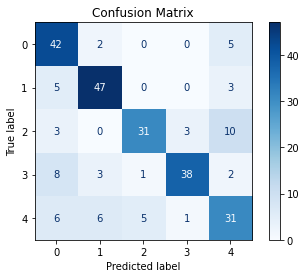

In [5]:
from train import validate
from dataset import get_mean_teacher_dataloaders
from coreplant import Classifier
import torch

NUM_CLASSES = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Classifier(512, 256, NUM_CLASSES).to(device)
state_dict = torch.load('models/coreplant_nirmal.pth')

model.load_state_dict(state_dict)
model.eval()

train_loader, test_loader, unlabeled_loader, unlabeled_student_loader = get_mean_teacher_dataloaders('data', 0.5, 16)
validate(model, test_loader, NUM_CLASSES)